In [1]:
import matplotlib.pyplot as plt

make some mock data

In [2]:
import numpy as np
from astropy.table import Table

n = 100
ra = np.random.uniform(0, 0.1, n)
dec = np.random.uniform(-0.05, 0.05, n)

true = Table({'ra': ra, 'dec': dec})
pred = Table({'ra': ra+np.random.normal(0, 0.1, n), 'dec': dec+np.random.normal(0, 0.1, n)})


In [3]:
pos_true = np.vstack([ra, dec]).T
pos_pred = np.vstack([pred['ra'].value, pred['dec'].value]).T

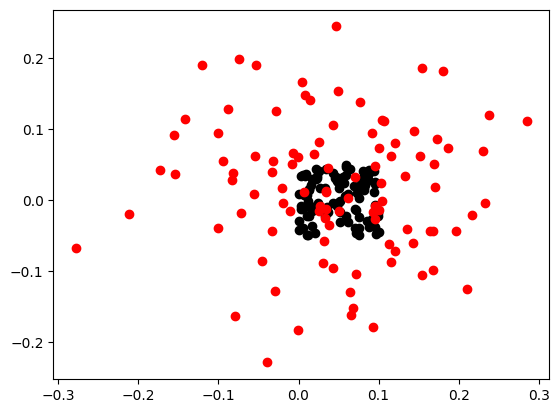

In [7]:
plt.scatter(pos_true[:, 0], pos_true[:, 1], c='k')
plt.scatter(pos_pred[:, 0], pos_pred[:, 1], c='r')


perform a matching

In [4]:
from scipy.spatial import KDTree
tree_true = KDTree(pos_true) # kdtree 
tree_pred = KDTree(pos_pred)

In [5]:
matches = tree_true.query_ball_tree(tree_pred, r=0.01)

In [6]:
matches

[[],
 [],
 [],
 [78],
 [],
 [],
 [68],
 [],
 [45, 75],
 [],
 [48],
 [10],
 [],
 [55],
 [],
 [],
 [40],
 [],
 [],
 [],
 [],
 [73],
 [],
 [],
 [],
 [25],
 [10],
 [73],
 [],
 [],
 [94],
 [],
 [34, 63, 82],
 [],
 [],
 [40, 75],
 [],
 [],
 [],
 [32],
 [],
 [15, 45],
 [],
 [],
 [],
 [55],
 [],
 [],
 [],
 [15],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [68],
 [],
 [],
 [25, 63, 74],
 [],
 [],
 [73],
 [],
 [],
 [],
 [],
 [],
 [],
 [45],
 [73],
 [],
 [48],
 [],
 [25, 63, 74],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [89, 94],
 [],
 [],
 [32],
 [],
 [],
 [],
 [],
 [15, 45, 75],
 [],
 [],
 [],
 [],
 [73],
 []]

true IDs that never found a match in the predicted catalog

In [11]:
id_lost = []
for i, true in enumerate(matches):
    if true == []:
        id_lost.append(i)
id_lost

[0,
 1,
 2,
 4,
 5,
 7,
 9,
 12,
 14,
 15,
 17,
 18,
 19,
 20,
 22,
 23,
 24,
 28,
 29,
 31,
 33,
 34,
 36,
 37,
 38,
 40,
 42,
 43,
 44,
 46,
 47,
 48,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 60,
 61,
 63,
 64,
 66,
 67,
 68,
 69,
 70,
 71,
 74,
 76,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 86,
 87,
 89,
 90,
 91,
 92,
 94,
 95,
 96,
 97,
 99]

IDs that were predicted but didn't match to truth

In [18]:
flatmatch = set([x for match in matches for x in match])

In [22]:
all_pred_ids = set(range(len(pred)))

In [23]:
id_found = all_pred_ids - flatmatch

In [8]:
# from astropy.table import Table
# def count_matches(match_info):
#     """For each group the number of matches in that group"""
    
#     _, counts = np.unique(match_info['group_id'], return_counts=True)
#     return counts - 1

class for match info

In [25]:
class match_info():
    def __init__(self, matches, true_inds, pred_inds):
        assert(len(matches) == len(true_inds))
        # generalize this later
        
        self.matches = matches
        self.lost = self.__get_lost__()
        self.found = self.__get_found__(pred_inds)
        
    def __get_lost__(self):
        id_lost = []
        for i, true in enumerate(self.matches):
            if true == []:
                id_lost.append(i)
        return(id_lost)
    
    def __get_found__(self, pred_inds):
        all_pred_ids = set(pred_inds)
        flatmatch = set([x for match in self.matches for x in match])
        id_found = all_pred_ids - flatmatch
        return(id_found)

In [27]:
test_match = match_info(matches, list(range(n)), list(range(n)))

In [29]:
test_match.lost == id_lost

True

In [30]:
test_match.found == id_found

True